In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [118]:
# 1 Million Points
x_data = np.linspace(0.0,10.0,1000000)

In [119]:
noise = np.random.randn(len(x_data))

In [120]:
# y = mx + b + noise_levels
b = 5

y_true =  (0.5 * x_data ) + 5 + noise

In [121]:
X_data = pd.DataFrame(x_data,columns=['x_data'])

In [122]:
X_data.head()


,x_data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [123]:
y_data = pd.DataFrame(y_true,columns=['Y'])

In [124]:
y_data.head()

,Y
0,4.452787
1,5.204354
2,5.135327
3,5.398739
4,5.299595


In [125]:
my_data= pd.concat([X_data,y_data],axis=1)

In [126]:
my_data.head()

,x_data,Y
0,0.00000,4.452787
1,0.00001,5.204354
2,0.00002,5.135327
3,0.00003,5.398739
4,0.00004,5.299595


In [127]:
my_data.sample(n=250)

,x_data,Y
244400,2.444002,6.447189
92407,0.924071,4.407110
92081,0.920811,5.114808
274433,2.744333,6.351567
853768,8.537689,7.583877
...,...,...
626407,6.264076,9.494586
771534,7.715348,8.063420
708695,7.086957,8.863481
318017,3.180173,7.292808


<AxesSubplot:xlabel='x_data', ylabel='Y'>

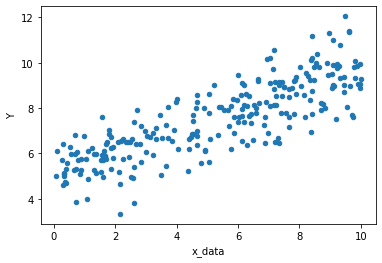

In [128]:
my_data.sample(n=250).plot(kind='scatter',x='x_data',y='Y')

In [129]:
# Random 10 points to grab
batch_size = 8

In [130]:
np.random.randn(2)

array([-0.73179317, -0.74527723])

In [131]:
m=tf.Variable(0.55)
b=tf.Variable(0.16)

In [132]:
xph=tf.placeholder(tf.float32,[batch_size])

In [133]:
yph=tf.placeholder(tf.float32,[batch_size])

In [134]:
#GRAPH OR OPERATIUON
y_model = m*xph + b

In [135]:
#loss function
error = tf.reduce_sum(tf.square(yph-y_model))

In [136]:
#optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [137]:
train= optimizer.minimize(error)

In [138]:
#variable intializtion

init = tf.global_variables_initializer()

In [139]:
with tf.Session() as sess:
    init.run()
    
    batches = 1000
    
    for i in range(batches):
        rand_ind= np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
    model_m,model_b= sess.run([m,b])

In [140]:
model_b

4.9203553

In [141]:
model_m

0.4963805

In [142]:
y_hat=x_data*model_m +model_b

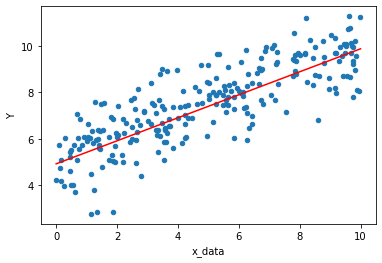

In [143]:
my_data.sample(n=250).plot(kind='scatter',x='x_data',y='Y')
plt.plot(x_data,y_hat,c='r')

## tf.estimator API

In [144]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [145]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ULTIMA~1\\AppData\\Local\\Temp\\tmpt0yioa68', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [146]:
#train test split
from sklearn.model_selection import train_test_split 

In [147]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [148]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [149]:
print(x_train.shape)
print(y_train.shape)

print(x_eval.shape)
print(y_eval.shape)

(700000,)
(700000,)
(300000,)
(300000,)


### Set up Estimator Inputs

In [150]:
# Can also do .pandas_input_fn


input_func= tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None,shuffle=True)

In [151]:
train_input_func= tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000,shuffle=False)

In [152]:
eval_input_func= tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=4,num_epochs=1000,shuffle=False)

### Train the Estimator

In [153]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


C:\Users\Ultimatrix\anaconda3\lib\site-packages\tensorflow_estimator\python\estimator\canned\linear.py:1468: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self.bias = self.add_variable(


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\ULTIMA~1\AppData\Local\Temp\tmpt0yioa68\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 272.15045, step = 1
INFO:tensorflow:global_step/sec: 1068.82
INFO:tensorflow:loss = 6.8724303, step = 101 (0.095 sec)
INFO:tensorflow:global_step/sec: 1218.27
INFO:tensorflow:loss = 11.3487835, step = 201 (0.082 sec)
INFO:tensorflow:global_step/sec: 1093.31
INFO:tensorflow:loss = 5.610056, step = 301 (0.090 sec)
INFO:tensorflow:global_step/sec: 1319.29
INFO:tensorflow:loss = 10.00364, step = 401 (0.076 sec)
INFO:tensorflow:global_step/sec: 1412.25
INFO:tensorflow:loss = 3.3247309, step = 501 (0.071 sec)
INFO:tens

# Evalution

In [155]:
train_metric=estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-11-18T17:19:04
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ULTIMA~1\AppData\Local\Temp\tmpt0yioa68\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Inference Time : 0.91678s
INFO:tensorflow:Finished evaluation at 2021-11-18-17:19:05
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1432781, global_step = 1000, label/mean = 7.5082617, loss = 4.5731125, prediction/mean = 7.2

In [156]:
eval_metric=estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-11-18T17:20:11
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ULTIMA~1\AppData\Local\Temp\tmpt0yioa68\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Inference Time : 0.85467s
INFO:tensorflow:Finished evaluation at 2021-11-18-17:20:12
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1252475, global_step = 1000, label/mean = 7.4686503, loss = 4.50099, prediction/mean = 7.251

In [160]:
print("train metrics: {}".format(train_metric))
print("eval metrics: {}".format(eval_metric))

train metric: {'average_loss': 1.1432781, 'label/mean': 7.5082617, 'loss': 4.5731125, 'prediction/mean': 7.289743, 'global_step': 1000}
eval metric: {'average_loss': 1.1252475, 'label/mean': 7.4686503, 'loss': 4.50099, 'prediction/mean': 7.251596, 'global_step': 1000}


In [161]:
### Predictions

In [162]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle=False)

In [163]:
estimator.predict(input_fn=input_fn_predict)

<generator object Estimator.predict at 0x000001A453D622E0>

In [164]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ULTIMA~1\AppData\Local\Temp\tmpt0yioa68\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


C:\Users\Ultimatrix\anaconda3\lib\site-packages\tensorflow_estimator\python\estimator\canned\linear.py:1468: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self.bias = self.add_variable(


[{'predictions': array([4.351885], dtype=float32)},
 {'predictions': array([5.0008564], dtype=float32)},
 {'predictions': array([5.649828], dtype=float32)},
 {'predictions': array([6.298799], dtype=float32)},
 {'predictions': array([6.947771], dtype=float32)},
 {'predictions': array([7.596742], dtype=float32)},
 {'predictions': array([8.245713], dtype=float32)},
 {'predictions': array([8.894686], dtype=float32)},
 {'predictions': array([9.543657], dtype=float32)},
 {'predictions': array([10.192628], dtype=float32)}]

In [165]:
predictions = []# np.array([])
for x in estimator.predict(input_fn=input_fn_predict):
    predictions.append(x['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ULTIMA~1\AppData\Local\Temp\tmpt0yioa68\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [166]:
predictions 

[array([4.351885], dtype=float32),
 array([5.0008564], dtype=float32),
 array([5.649828], dtype=float32),
 array([6.298799], dtype=float32),
 array([6.947771], dtype=float32),
 array([7.596742], dtype=float32),
 array([8.245713], dtype=float32),
 array([8.894686], dtype=float32),
 array([9.543657], dtype=float32),
 array([10.192628], dtype=float32)]

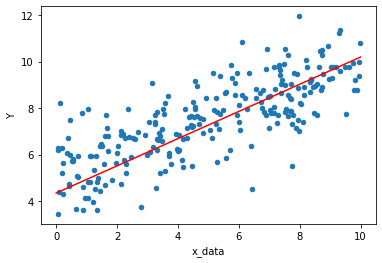

In [171]:
my_data.sample(n=250).plot(kind='scatter',x='x_data',y='Y')
plt.plot(np.linspace(0,10,10),predictions,'r')